In [1]:
import sympy
import numpy as np
import pandas as pd
from sympy import *
from sympy.stats import *

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display

In [3]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
init_printing( use_latex='mathjax' )

In [1]:
import matplotlib.pyplot as plt

In [4]:
pwd

'/Users/nymath'

In [8]:
cd('/Users/nymath')

[Errno 2] No such file or directory: '(/Users/nymath)'
/Users/nymath


## 变量定义

我们对Pow对象进行符号运算，如果需要数值可以用lambdify转成np的对象进行求解

In [7]:
x,y,m,n,a,λ,u,v,a,b,c,d,t = symbols('x y m n a λ u v a b c d t')
μ,σ=symbols('μ σ',real=True)
x_1 = symbols('x_1')
type(x) #Symbol对象

sympy.core.symbol.Symbol

In [8]:
#复变量定义
z = symbols('z',complex=True)

In [6]:
expr1 = (x+1)**2
expr2 = x**2+2*x+1
#print(expr1 == expr2)
#type(expr1) #Pow对象
diff(expr1,x)

2⋅x + 2

In [7]:
#分式
print(S(4)/9)
print((S(4)/9).evalf())

4/9
0.444444444444444


In [298]:
# 创建函数
f = lambdify(x,expr1)
print(f)

<function _lambdifygenerated at 0x0000015492D2EF70>


In [242]:
# 矩阵
solve(Matrix([[1-λ,2,2],[2,1-λ,1],[1,3,3-λ]]).det(),λ)

⎡   5   √33  5   √33⎤
⎢0, ─ - ───, ─ + ───⎥
⎣   2    2   2    2 ⎦

## 求解方程或者不等式

In [243]:
type(sympy.solve(x**2-a,x)[1])

sympy.core.power.Pow

In [244]:
#不等式
solve_univariate_inequality(x**2 > 4, x)

(-∞ < x ∧ x < -2) ∨ (2 < x ∧ x < ∞)

In [245]:
#线性方程组
#线性方程组产生了一个list,可以利用相似办法求解
print(type(solve([x + 2*y + 1, x - 3*y - 2], x, y)))
solve([x + 2*y + 1, x - 3*y - 2], x, y)

<class 'dict'>


{x: 1/5, y: -3/5}

In [246]:
print(solve([x + 2*y + 1, x - 3*y - 2], x, y)[x])
print(solve([x + 2*y + 1, x - 3*y - 2], x, y)[y])

1/5
-3/5


In [247]:
#非线性方程组照样求
#返回list
solve([x**2 + y**2 - 1, x**2 - y**2 - S(1) / 2], x, y)

⎡⎛-√3       ⎞  ⎛-√3      ⎞  ⎛√3      ⎞  ⎛√3     ⎞⎤
⎢⎜────, -1/2⎟, ⎜────, 1/2⎟, ⎜──, -1/2⎟, ⎜──, 1/2⎟⎥
⎣⎝ 2        ⎠  ⎝ 2       ⎠  ⎝2       ⎠  ⎝2      ⎠⎦

In [248]:
Matrix([[a,b,u],[c,d,v]])

⎡a  b  u⎤
⎢       ⎥
⎣c  d  v⎦

In [249]:
solve_linear_system(Matrix([[a,b,u],[c,d,v]]),x,y)

⎧   -b⋅v + d⋅u     a⋅v - c⋅u⎫
⎨x: ──────────, y: ─────────⎬
⎩   a⋅d - b⋅c      a⋅d - b⋅c⎭

## 线性代数

In [8]:
A = Matrix([[2,-1,1],[1,2,-1],[1,-1,2]])

In [9]:
# 可以发现A的特征空间与exp(A)相同
A.eigenvects()
exp(A).eigenvects()

⎡⎛      ⎡⎡0⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎢⎜1, 1, ⎢⎢1⎥⎥⎟, ⎜2, 1, ⎢⎢1⎥⎥⎟, ⎜3, 1, ⎢⎢0⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

⎡⎛      ⎡⎡0⎤⎤⎞  ⎛       ⎡⎡1⎤⎤⎞  ⎛       ⎡⎡1⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜ 2     ⎢⎢ ⎥⎥⎟  ⎜ 3     ⎢⎢ ⎥⎥⎟⎥
⎢⎜ℯ, 1, ⎢⎢1⎥⎥⎟, ⎜ℯ , 1, ⎢⎢1⎥⎥⎟, ⎜ℯ , 1, ⎢⎢0⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜       ⎢⎢ ⎥⎥⎟  ⎜       ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣1⎦⎦⎠  ⎝       ⎣⎣1⎦⎦⎠  ⎝       ⎣⎣1⎦⎦⎠⎦

In [23]:
P = A.jordan_form()[0]
P

⎡0  1  1⎤
⎢       ⎥
⎢1  1  0⎥
⎢       ⎥
⎣1  1  1⎦

In [24]:
GramSchmidt([P[:,0],P[:,1],P[:,2]])

⎡⎡0⎤  ⎡1⎤  ⎡ 0  ⎤⎤
⎢⎢ ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎢⎢1⎥, ⎢0⎥, ⎢-1/2⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎣⎣1⎦  ⎣0⎦  ⎣1/2 ⎦⎦

In [25]:
A*Matrix([[0],[-0.5],[0.5]])

⎡1.0 ⎤
⎢    ⎥
⎢-1.5⎥
⎢    ⎥
⎣1.5 ⎦

## 实变函数

In [32]:
x = symbols('x')

In [33]:
f = (x**a)*d
f = f.subs(a, 0.6237).subs(d,3.2744)
f

        0.6237
3.2744⋅x      

In [20]:
import numpy as np

In [50]:
xx = np.linspace(0,12,100)
y1 = xx+4

In [51]:
lambdify(x,f)(xx)

array([ 0.        ,  0.87809075,  1.35298136,  1.74228794,  2.08470314,
        2.396001  ,  2.6845552 ,  2.95547338,  3.212156  ,  3.45700858,
        3.69181053,  3.91792413,  4.13642112,  4.34816357,  4.55385774,
        4.75409135,  4.94935992,  5.14008613,  5.3266341 ,  5.50932034,
        5.68842206,  5.86418386,  6.03682283,  6.20653281,  6.37348775,
        6.53784451,  6.69974512,  6.85931873,  7.01668319,  7.1719464 ,
        7.32520748,  7.47655775,  7.62608156,  7.77385701,  7.91995665,
        8.06444795,  8.20739383,  8.34885309,  8.48888076,  8.62752843,
        8.7648446 ,  8.90087486,  9.0356622 ,  9.16924717,  9.30166808,
        9.43296121,  9.56316092,  9.69229977,  9.82040873,  9.94751721,
       10.0736532 , 10.19884339, 10.32311319, 10.4464869 , 10.56898769,
       10.69063774, 10.81145827, 10.9314696 , 11.05069121, 11.16914177,
       11.28683922, 11.40380079, 11.52004301, 11.63558183, 11.75043254,
       11.86460993, 11.97812819, 12.09100104, 12.20324169, 12.31

In [52]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # 高清图

<Figure size 576x504 with 0 Axes>

(0.0, 18.0)

Text(0.5, 0, 'S_1')

Text(0, 0.5, 'S_2')

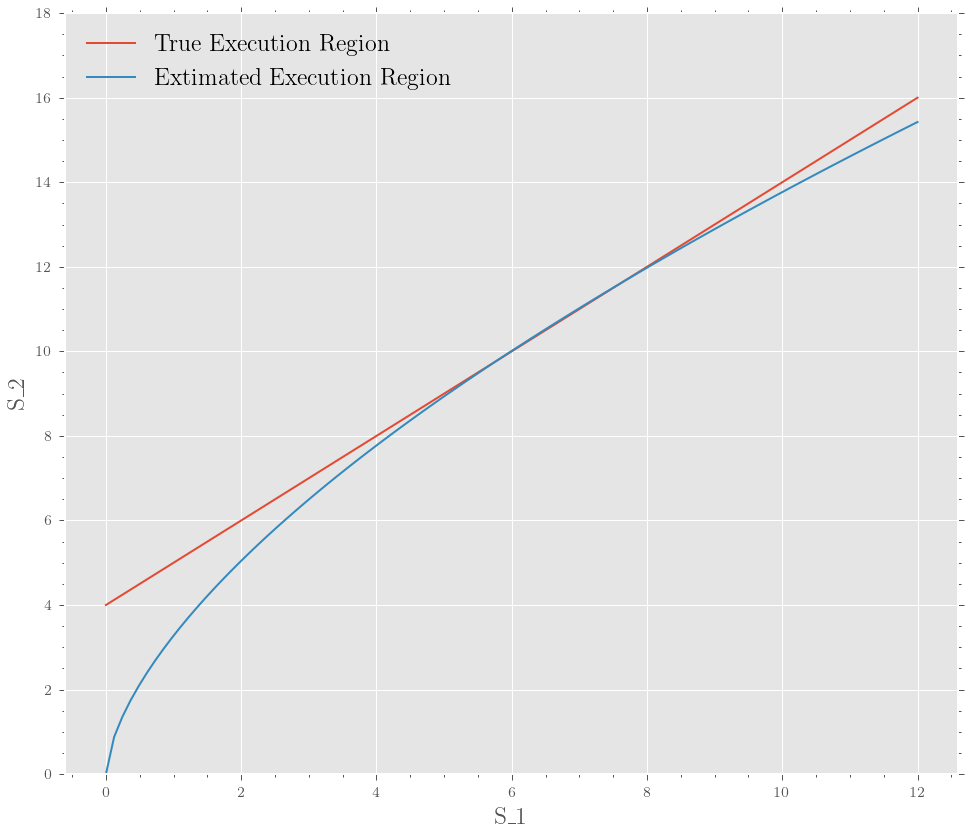

In [64]:
#plt.style.use(['nature','science'])
plt.style.use('ggplot')
plt.figure(figsize=(8,7))
plt.plot(xx,xx+4)
plt.plot(xx,lambdify(x,f)(xx))
plt.ylim(0,18)
plt.xlabel('S_1')
plt.ylabel('S_2')
plt.legend(['True Execution Region','Extimated Execution Region'], fontsize=12, loc=2)
plt.savefig('C:/Users/17800/Desktop/ppttemplate/estimation.pdf', dpi=1200, bbox_inches='tight',format="pdf") 

In [ ]:
        plt.style.use(['nature','science'])
        plt.figure(figsize=(8,7))
        plt.plot(self.fpr, self.tpr, lw=2, alpha=.6)
        plt.plot([0, 1], [0, 1], lw=2, linestyle="--")
        plt.xlim([-0.05, 1])
        plt.ylim([-0.005, 1.05])
        plt.xlabel("False Positive Rate",fontsize=10)
        plt.ylabel("True Positive Rate",fontsize=10)
        plt.title("ROC curve",fontsize=12)
        plt.legend(["(AUC {:.4f})".format(self.auc)], fontsize=8, loc=2)

In [251]:
f.subs(x,2)

1/5

In [252]:
#求导
diff(f,x,2) #f''

  ⎛    2     ⎞
  ⎜ 4⋅x      ⎟
2⋅⎜────── - 1⎟
  ⎜ 2        ⎟
  ⎝x  + 1    ⎠
──────────────
          2   
  ⎛ 2    ⎞    
  ⎝x  + 1⎠    

In [253]:
#极限
print(limit(f,x,2)) #返回一种特殊对象,如何转化为python的基本对象?evalf()
print(limit(f,x,oo))

1/5
0


In [254]:
float(limit(f,x,2).evalf())

0.2

In [255]:
#Taylor展开
series(f,x,x0=0,n=10)

     2    4    6    8    ⎛ 10⎞
1 - x  + x  - x  + x  + O⎝x  ⎠

In [256]:
#符号积分-不定积分
integrate(f,x)

atan(x)

In [257]:
#符号积分-定积分
print(integrate(f,(x,0,10)))
print(integrate(f,(x,0,oo)))

atan(10)
pi/2


In [258]:
??integrate

In [259]:
##二重积分
integrate(x**2+y**2,(x,0,y),(y,0,1)) #按照顺序积分

1/3

In [261]:
idiff(x**2+y**2-1,y,x)

-x 
───
 y 

In [262]:
#傅里叶变换
fourier_transform(f, x, z)

   -2⋅π⋅z
π⋅ℯ      

In [263]:
#Laplace变换
laplace_transform(f,x,z)

⎛⎛         π⎞                               ⎞
⎜⎜-Si(z) + ─⎟⋅cos(z) + sin(z)⋅Ci(z), 0, True⎟
⎝⎝         2⎠                               ⎠

## 复变函数

### CR方程

In [293]:
integrate(exp(I*t),t)

    ⅈ⋅t
-ⅈ⋅ℯ   

In [294]:
integrate(exp(Z),Z)

 Z
ℯ 

### 路径积分

In [47]:
z0 = symbols('z0')

In [108]:
## 回路积分
def cintegrate(f,z0=0,r=0.1):
    h = (f.subs(z,z0+r*exp(I*t)))*r*I*exp(I*t)
    print(h)
    return integrate((f.subs(z,z0+r*exp(I*t)))*r*I*exp(I*t),(t,0,2*pi))
cintegrate(1/(z),z0=0,r=0.0001)

1.0*I


2.0⋅ⅈ⋅π

In [103]:
integrate(sin(x)/x,(x,0,oo))

π
─
2

### 洛朗级数

#### m级零点

In [43]:
f = (z - sin(z))*z**5
def zerom(f):
    i = 1
    while i:
        if diff(f,z,i).subs(z,0)!=0:
            break
        else:
            i=i+1
    return i
zerom(f)

8

In [27]:
diff(f,z,1).subs(z,0)

0

In [20]:
f = z - sin(z)
diff(f,z,1).subs(z,0)

0

In [10]:
#有理多项式分解
q = 1
p = z**2*(z-I)
apart(q/p,z,full=True).doit()

    1     1   ⅈ 
- ───── + ─ + ──
  z - ⅈ   z    2
              z 

In [12]:
series(exp(x),x,x0=0,n=10)

         2    3    4     5     6     7       8       9           
        x    x    x     x     x     x       x       x       ⎛ 10⎞
1 + x + ── + ── + ── + ─── + ─── + ──── + ───── + ────── + O⎝x  ⎠
        2    6    24   120   720   5040   40320   362880         

In [19]:
diff(x**n,(x,m))

  m    
 ∂ ⎛ n⎞
───⎝x ⎠
  m    
∂x     

SyntaxError: invalid syntax (Temp/ipykernel_23872/1387249117.py, line 1)

## 概率统计

In [13]:
#定义随机变量
X,Y = Die('X',6),Die('Y',6)

In [14]:
print(P(X>3)*P(Y>3))
print(P(X>3,Y>3))

1/4
1/2


### 正态变量

In [266]:
Z = Normal('Z',0,1)

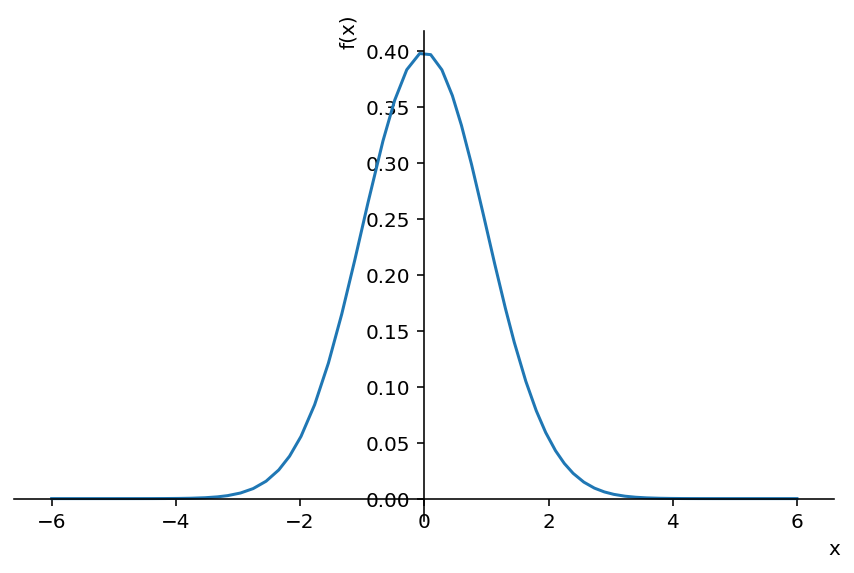

In [267]:
plot(density(Z)(x), (x, -6, 6))

In [268]:
#累积分布函数
P(Z<x) 

        ⎛√2⋅x⎞
    erfc⎜────⎟
        ⎝ 2  ⎠
1 - ──────────
        2     

In [269]:
#分位数函数
quantile(Z)(x)

√2⋅erfinv(2⋅x - 1)

In [270]:
#密度函数
#diff(P(Z<x),x)
density(Z)(x)

      2 
    -x  
    ────
     2  
√2⋅ℯ    
────────
  2⋅√π  

In [271]:
#期望方差
print(E(Z**2))
print(variance(Z))

1
1


### 对数正态

In [272]:
LZ = log(σ*Z+μ)

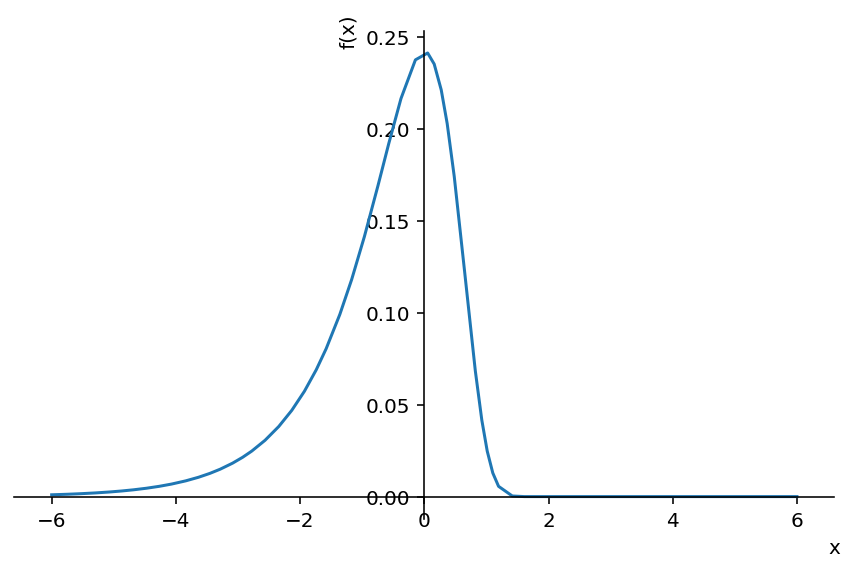

In [273]:
plot(density(LZ.subs(μ,0).subs(σ,1))(x), (x, -6, 6))

### Gamma Distribution

In [274]:
X = Gamma('X',m,n)

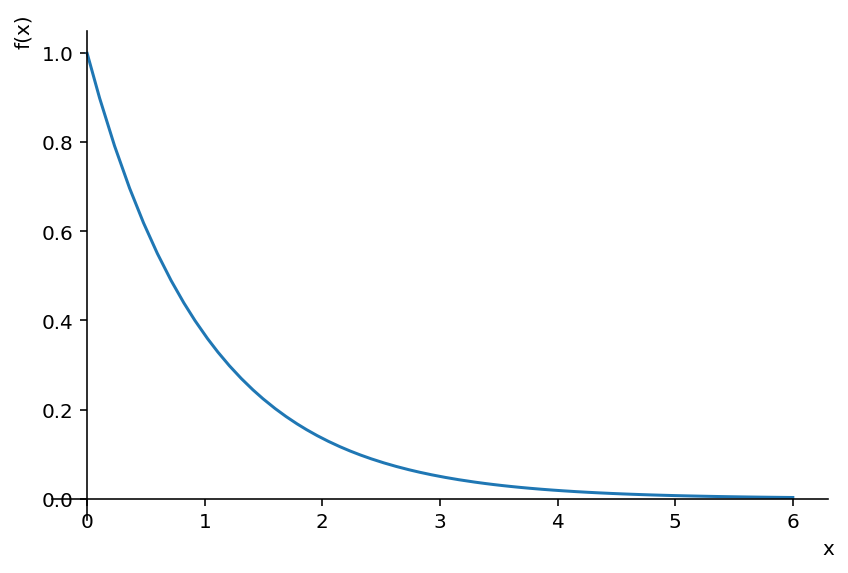

In [275]:
plot(density(X.subs(m,1).subs(n,1))(x),(x,0,6))

In [276]:
#期望方差
print(E(X))
print(variance(X))

m*n
m*n**2


### 均匀变量

In [277]:
U = Uniform('U',0,1)

## 随机过程

In [7]:
B = WienerProcess('B')

In [21]:
B.state_space

ℝ

In [18]:
t1,t2 = symbols('t1 t2',positive=True,real=True)

In [19]:
#密度函数
diff(P(B(t1)<x),x)

        2  
      -x   
      ──── 
      2⋅t₁ 
  √2⋅ℯ     
───────────
       ____
2⋅√π⋅╲╱ t₁ 

In [73]:
P((B(t1) > 2) | (B(t1) < 4), Contains(t1, Interval(2, 4))).simplify()

  erf(1)   erf(2)    
- ────── + ────── + 1
    2        2       

In [283]:
Contains(t1, Interval.Ropen(2, 4))

t₁ ∈ [2, 4)

In [284]:
??symbols

In [285]:
n = symbols('n',integer=True)
f = symbols('f',cls=Function)

In [286]:
f = lambda n :diff(1/x,x,n)

In [1]:
import latex2sympy

In [2]:
from process_latex import process_sympy

ModuleNotFoundError: No module named 'process_latex'